In [ ]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


--2020-11-02 02:07:14--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-11-02 02:07:15--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-11-02 02:07:16--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-11-02 02:07:16--  https://www.dropbox.com/s/raw/7rjw

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 1.3806 - accuracy: 0.5104 - val_loss: 0.6869 - val_accuracy: 0.9000
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 0.6579 - accuracy: 0.6094 - val_loss: 0.6379 - val_accuracy: 0.8167
Epoch 3/10
6/6 [==============================] - 8s 1s/step - loss: 0.5912 - accuracy: 0.7083 - val_loss: 0.5513 - val_accuracy: 0.9333
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.4789 - accuracy: 0.8073 - val_loss: 0.3469 - val_accuracy: 0.9333
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.3654 - accuracy: 0.8438 - val_loss: 0.2789 - val_accuracy: 0.9167
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.2846 - accuracy: 0.8802 - val_loss: 0.1623 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 0.2569 - accuracy: 0.8490 - val_l

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.15604832768440247, 0.9642857313156128]

In [ ]:
model.evaluate_generator(validation_generator)

[0.11538414657115936, 0.9666666388511658]

In [ ]:
model=load_model("model_adv.h5")

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)




In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)
  


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

In [ ]:
import seaborn as sns

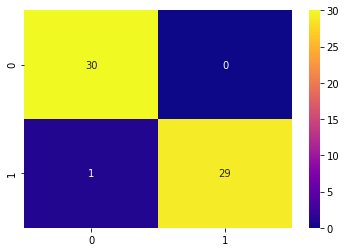

In [ ]:
sns.heatmap(cm,cmap="plasma",annot=True)